### Student Name: Michael Corrado

In [1]:
#TODO: import the modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Step 1 – Load the data
Load `trip_data.csv`, select the salient features and engineer new features (if necessary).

In [2]:
#TODO: Load the data
df = pd.read_csv("/Users/Michael/Python Anaconda/Machine_Learning_SHU/module_7/trip_data.csv")

In [3]:
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,tip
0,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,1.0,24,41,1.0,0.67,5.5,0.5,0.5,0.0,0.3,8.84,1.0,0.00,good
1,2.0,2019-12-01 00:56:08,2019-12-01 01:05:11,1.0,112,232,1.0,2.64,10.0,0.5,0.5,0.0,0.3,16.86,1.0,2.75,low
2,2.0,2019-12-01 00:10:32,2019-12-01 00:34:48,1.0,97,227,5.0,3.85,18.0,0.5,0.5,0.0,0.3,22.20,1.0,0.00,low
3,2.0,2019-12-01 00:32:08,2019-12-01 00:44:06,1.0,223,129,1.0,2.97,11.5,0.5,0.5,0.0,0.3,13.80,1.0,0.00,low
4,2.0,2019-12-01 00:13:31,2019-12-01 00:22:38,1.0,223,7,1.0,1.60,8.0,0.5,0.5,0.0,0.3,11.62,1.0,0.00,good
5,2.0,2019-12-01 00:09:15,2019-12-01 00:14:28,1.0,255,255,1.0,0.63,5.0,0.5,0.5,0.0,0.3,7.56,1.0,0.00,standard
6,2.0,2019-12-01 00:12:29,2019-12-01 00:27:39,1.0,75,116,1.0,3.66,13.5,0.5,0.5,0.0,0.3,17.76,1.0,0.00,low
7,2.0,2019-12-01 00:47:58,2019-12-01 00:59:03,1.0,42,43,1.0,2.44,10.5,0.5,0.5,0.0,0.3,12.80,1.0,0.00,low
8,2.0,2019-12-01 00:18:47,2019-12-01 00:31:28,1.0,83,160,1.0,2.82,11.5,0.5,0.5,0.0,0.3,15.80,1.0,0.00,standard
9,2.0,2019-12-01 00:58:22,2019-12-01 01:03:44,1.0,7,223,1.0,1.32,6.5,0.5,0.5,0.0,0.3,10.14,1.0,0.00,good


In [4]:
df.shape

(171941, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171941 entries, 0 to 171940
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               171941 non-null  float64
 1   lpep_pickup_datetime   171941 non-null  object 
 2   lpep_dropoff_datetime  171941 non-null  object 
 3   RatecodeID             171941 non-null  float64
 4   PULocationID           171941 non-null  int64  
 5   DOLocationID           171941 non-null  int64  
 6   passenger_count        171941 non-null  float64
 7   trip_distance          171941 non-null  float64
 8   fare_amount            171941 non-null  float64
 9   extra                  171941 non-null  float64
 10  mta_tax                171941 non-null  float64
 11  tolls_amount           171941 non-null  float64
 12  improvement_surcharge  171941 non-null  float64
 13  total_amount           171941 non-null  float64
 14  trip_type              171941 non-nu

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,171941.0,1.842190,0.364564,1.00,2.00,2.00,2.00,2.00
RatecodeID,171941.0,1.045731,0.424170,1.00,1.00,1.00,1.00,5.00
PULocationID,171941.0,103.152558,68.253994,1.00,52.00,75.00,145.00,265.00
DOLocationID,171941.0,133.958707,77.035977,1.00,66.00,137.00,203.00,265.00
passenger_count,171941.0,1.306262,0.965556,0.00,1.00,1.00,1.00,9.00
trip_distance,171941.0,2.359276,1.759422,0.01,1.08,1.80,3.10,8.43
fare_amount,171941.0,11.121357,6.393361,0.01,6.50,9.50,14.00,180.00
extra,171941.0,0.448590,0.632314,0.00,0.00,0.50,0.50,4.50
mta_tax,171941.0,0.494548,0.052529,0.00,0.50,0.50,0.50,3.55
tolls_amount,171941.0,0.077659,0.690598,0.00,0.00,0.00,0.00,22.74


In [7]:
for column in df:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

2.0    0.84219
1.0    0.15781
Name: VendorID, dtype: float64
--------------------------------------------------
2019-12-17 18:51:35    0.000023
2019-12-10 18:39:12    0.000023
2019-12-06 20:21:27    0.000023
2019-12-19 18:35:50    0.000023
2019-12-12 09:18:55    0.000023
                         ...   
2019-12-10 19:32:27    0.000006
2019-12-10 19:25:22    0.000006
2019-12-10 19:42:44    0.000006
2019-12-10 19:52:56    0.000006
2019-12-31 23:21:06    0.000006
Name: lpep_pickup_datetime, Length: 164373, dtype: float64
--------------------------------------------------
2019-12-09 00:00:00    0.000047
2019-12-08 00:00:00    0.000047
2019-12-31 00:00:00    0.000047
2019-12-11 00:00:00    0.000047
2019-12-04 00:00:00    0.000041
                         ...   
2019-12-10 19:15:24    0.000006
2019-12-10 19:20:05    0.000006
2019-12-10 19:50:21    0.000006
2019-12-10 19:52:06    0.000006
2019-12-31 23:47:15    0.000006
Name: lpep_dropoff_datetime, Length: 164294, dtype: float64
--------------

### Step 2 – Split the data

In [8]:
df = pd.DataFrame(df)

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,tip
0,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,1.0,24,41,1.0,0.67,5.5,0.5,0.5,0.0,0.3,8.84,1.0,0.00,good
1,2.0,2019-12-01 00:56:08,2019-12-01 01:05:11,1.0,112,232,1.0,2.64,10.0,0.5,0.5,0.0,0.3,16.86,1.0,2.75,low
2,2.0,2019-12-01 00:10:32,2019-12-01 00:34:48,1.0,97,227,5.0,3.85,18.0,0.5,0.5,0.0,0.3,22.20,1.0,0.00,low
3,2.0,2019-12-01 00:32:08,2019-12-01 00:44:06,1.0,223,129,1.0,2.97,11.5,0.5,0.5,0.0,0.3,13.80,1.0,0.00,low
4,2.0,2019-12-01 00:13:31,2019-12-01 00:22:38,1.0,223,7,1.0,1.60,8.0,0.5,0.5,0.0,0.3,11.62,1.0,0.00,good


In [11]:
#TODO: Split the data into training and test sets
X=df.drop(['tip','lpep_pickup_datetime','lpep_dropoff_datetime'], axis=1)
Y=df['tip']
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [12]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['good', 'low', 'no-tip','standard'], yticklabels=['good', 'low', 'no-tip','standard'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Step 3 – Create the Classifier
Use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) in scikit-learn and optimize the parameters to achieve a prediction accuracy of 95% (or higher).

In [13]:
#Create the RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion= 'entropy',  #TODO: provide an option 
                                    max_depth=10 ,     #TODO: provide a value. The depth should not exceed 15.
                                    max_features= 3,  #TODO: provide a suitable value
                                    min_samples_split= 2, #TODO: provide a suitable value
                                    n_estimators= 7, #TODO: provide a suitable value
                                    random_state=1  #TODO: provide a suitable value
                                    )

#TODO: Train classifer using the `fit` method


#TODO: Make predictions with the test set


#TODO: evaluate the accuracy

In [14]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       n_estimators=7, random_state=1)

              precision    recall  f1-score   support

        good       0.86      0.42      0.56     19732
         low       0.73      0.48      0.58     28008
      no-tip       0.84      0.61      0.71     18254
    standard       0.66      0.96      0.78     54364

    accuracy                           0.71    120358
   macro avg       0.77      0.62      0.66    120358
weighted avg       0.74      0.71      0.69    120358



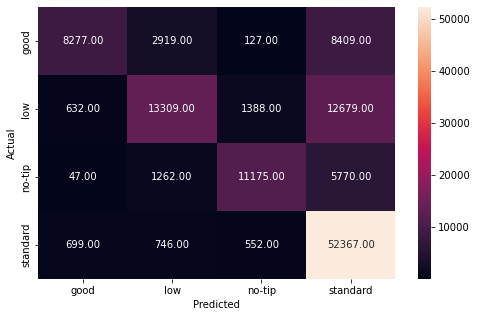

In [15]:
y_train_pred_rf=rf_classifier.predict(X_train)
metrics_score(y_train,y_train_pred_rf)

### Step 4 – Make predictions with new data

In [16]:
#TODO: Use the model to make predictions with the supplied test set: `new_trips.csv`
df2 = pd.read_csv("/Users/Michael/Python Anaconda/Machine_Learning_SHU/module_7/trip_data.csv")

In [17]:
df2.dropna(inplace=True)

In [18]:
X2=df.drop(['tip','lpep_pickup_datetime','lpep_dropoff_datetime'], axis=1)
Y2=df['tip']
X_train2,X_test2,y_train2,y_test2=train_test_split(X, Y, test_size=0.30, random_state=1)

              precision    recall  f1-score   support

        good       0.42      0.86      0.56      9655
         low       0.48      0.73      0.58     18236
      no-tip       0.61      0.84      0.71     13242
    standard       0.96      0.66      0.78     79225

    accuracy                           0.71    120358
   macro avg       0.62      0.77      0.66    120358
weighted avg       0.81      0.71      0.73    120358



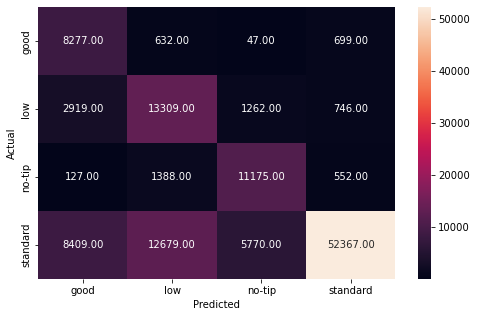

In [20]:
metrics_score(y_train_pred_rf,y_train2)

### Step 5 – Summary
Summarize the results and explain the reason that ensemble methods can improve a model's ability to generalize.

**Explain the results**

The confusion matrix above shows that the testing on the dataset trip_data.csv is 71% accurate on testing what tip the driver received. The model had the hardest time predicting tips that were good or low.
 
The confusion matrix above shows that the testing on the dataset new_trips.csv is also 71% accurate on testing the tip the driver received. This means that are model is not overfitting and has around a 71% accuracy when calculating drivers tip
